# FastGradRidgeLogit Demo on Real World Dataset


## About Data

#### Data Name:  

SPAM E-mail Data

#### Description:

Number of Instances: 4601 (1813 Spam = 39.4%)

Number of Attributes: 58 (57 continuous, 1 nominal class label)

The last column of 'spambase.data' denotes whether the e-mail was 
considered spam (1) or not (0)

To explore full documentation of the data set, please check [https://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/spam.info.txt](https://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/spam.info.txt)

## Data Process Before Model Training



In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing

spam = pd.read_table('https://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/spam.data', sep=' ', header=None)
test_indicator = pd.read_table('https://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/spam.traintest', sep=' ',
                               header=None)

x = np.asarray(spam)[:, 0:-1]
y = np.asarray(spam)[:, -1]*2 - 1  # Convert to +/- 1
test_indicator = np.array(test_indicator).T[0]

# Divide the data into train, test sets
x_train = x[test_indicator == 0, :]
x_test = x[test_indicator == 1, :]
y_train = y[test_indicator == 0]
y_test = y[test_indicator == 1]

# Standardize the data. 
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Train Model Using FastGradRidgeLogit

In [2]:
from fgrlogit import FastGradRidgeLogit

fg = FastGradRidgeLogit()

**FastGradRidgeLogit.fit(lambduh, x, y, maxiter = 300)**

Fit the model with x_train dataset and y_train dataset.

In [3]:
fg.fit(lambduh = 0.1,x = x_train,y = y_train)

Start fast gradient descent:
Fast gradient iteration 100
Fast gradient iteration 200
Fast gradient iteration 300


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00811784, -0.00290854,  0.01525627, ...,  0.00797122,
         0.01367347,  0.01683449],
       [ 0.01430038, -0.00561651,  0.02786037, ...,  0.01446999,
         0.02484187,  0.0308083 ],
       ..., 
       [ 0.02117346, -0.03877587,  0.0977377 , ...,  0.06871946,
         0.12509328,  0.14818874],
       [ 0.02117345, -0.03877587,  0.09773769, ...,  0.06871949,
         0.12509325,  0.14818874],
       [ 0.02117345, -0.03877586,  0.09773769, ...,  0.0687195 ,
         0.12509324,  0.14818872]])

**FastGradRidgeLogit.plot_objective( )**

After fitting the model, we can visualize the objective value change through the iteration by calling plot_objective().

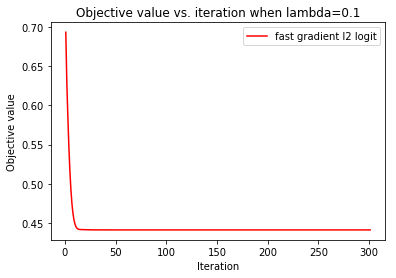

In [4]:
fg.plot_objective()

**FastGradRidgeLogit.plot_misclassification_error( )**

After fitting the model, we can also visualize the model performance through the iteration by calling plot_misclassification_error().

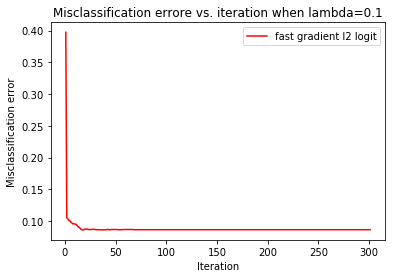

In [5]:
fg.plot_misclassification_error()